In [27]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
%pylab inline
import sys
sys.path.remove('/global/homes/d/dorislee/.local/lib/python2.7/site-packages/yt-3.2.dev0-py2.7-linux-x86_64.egg')
sys.path.remove('/global/homes/d/dorislee/.local/lib/python2.7/site-packages')
sys.path.append('/global/homes/d/dorislee/mypythonpackages')

In [2]:
import yt
yt.funcs.mylog.setLevel(50) #coerce output null

In [31]:
cd ~/ramses/trunk/ramses/

/global/u2/d/dorislee/ramses/trunk/ramses


In [53]:
def plot_time(physical_quantity,timestep):
    ds= yt.load("bin/output_0000{0}/info_0000{0}.txt".format(timestep))
    proj = yt.ProjectionPlot(ds, "z",physical_quantity ,window_size=5)
    proj.set_cmap("density","rainbow")
    proj.annotate_velocity()
    proj.annotate_grids()
    proj.show()

/global/homes/d/dorislee/mypythonpackages/yt/units/yt_array.py:759: RuntimeWarning: invalid value encountered in divide
  return YTArray(super(YTArray, self).__div__(ro))



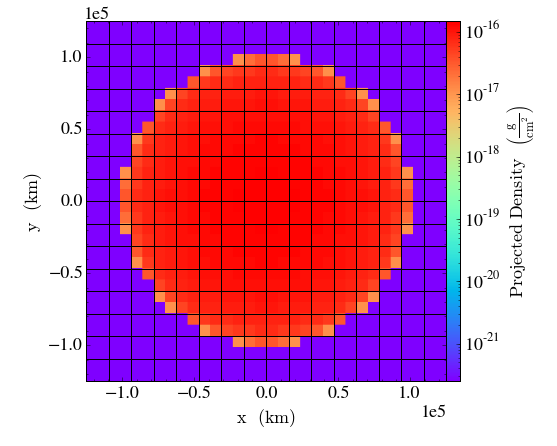


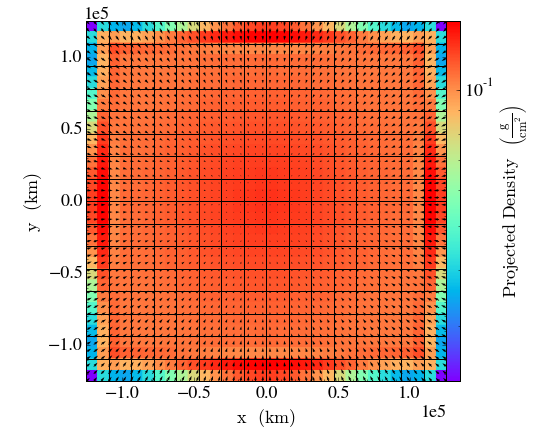


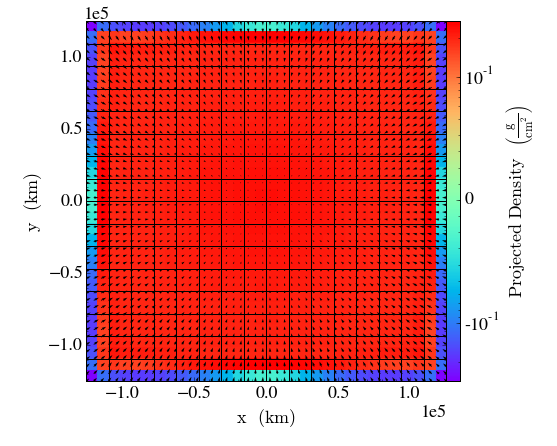

In [54]:
max_timestep = 4
for i in np.arange(1,max_timestep):
    plot_time("density",i)

As expected, density and cell mass is the same because the cell sizes are the same


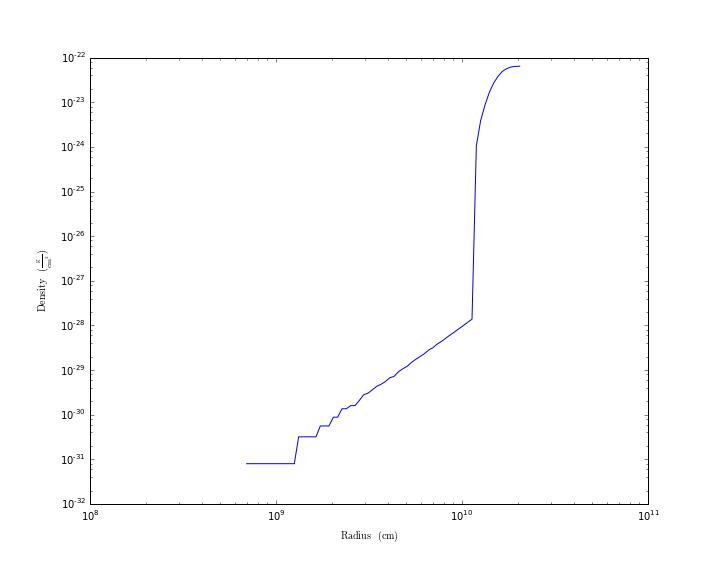

In [62]:
import yt
ds = yt.load("bin/output_00001/info_00001.txt")
sphere = ds.sphere([0.,0.,0.], (0.1, "pc"))
# plot = yt.ProfilePlot(sphere, "radius", ["cell_mass"],weight_field=None, accumulation=True)
# plot.show()
plot = yt.ProfilePlot(sphere, "radius", ["density"],weight_field=None, accumulation=True)
plot.show()

Just realized that I was doing a Projection plot and not a slice so the density may have been averaged or something 

In [63]:
def plot_slice(physical_quantity,timestep):
    ds= yt.load("bin/output_0000{0}/info_0000{0}.txt".format(timestep))
    proj = yt.SlicePlot(ds, "z",physical_quantity ,window_size=5)
    proj.set_cmap("density","rainbow")
    proj.annotate_velocity()
    proj.annotate_grids()
    proj.show()


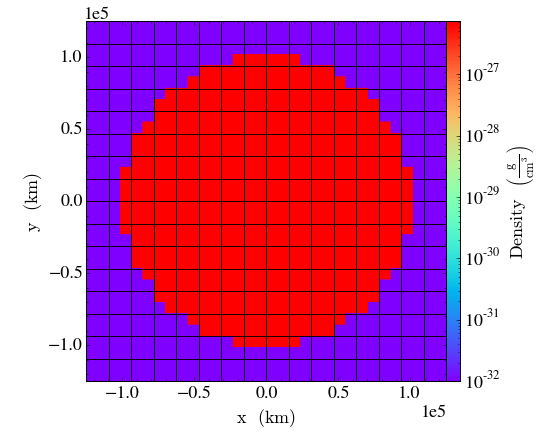


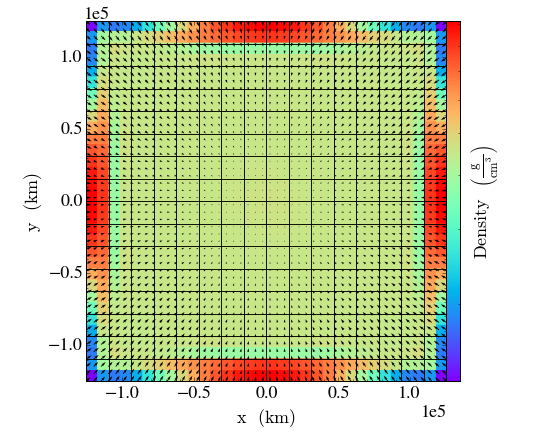


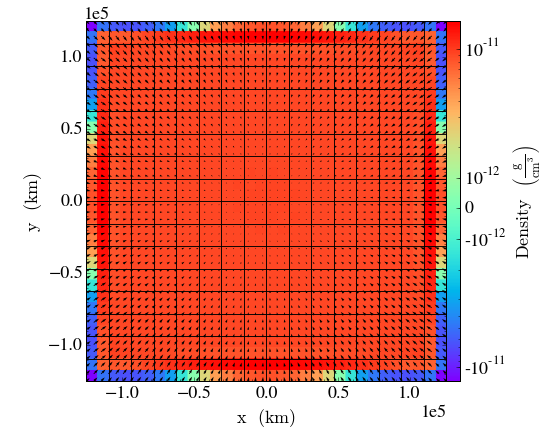

In [65]:
max_timestep = 4
for i in np.arange(1,max_timestep):
    plot_slice("density",i)

Yes, so it is different. Just noticed that boundary cells are actually getting negative densities, which is bad and unphysical...

In [96]:
def density_radial_profile(timestep):
    ds= yt.load("bin/output_0000{0}/info_0000{0}.txt".format(timestep))
    c = ds.find_max("density")[1]
    ax = 0 # Cut through x axis
    # cutting through the y0,z0 such that we hit the max density
    ray = ds.ortho_ray(ax, (c[1], c[2]))
    srt = np.argsort(ray['x'])
    plt.figure()
    plt.subplot(211)
    plt.loglog(np.array(ray['x'][srt]), np.array(ray['density'][srt]))
    plt.title("Timestep {}".format(timestep),fontsize=13)
    plt.xlabel("Radius",fontsize=13)
    plt.ylabel('Density',fontsize=13)
    # plt.subplot(212)

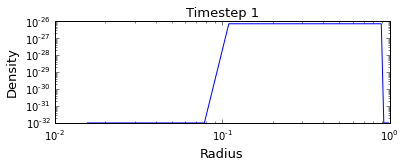

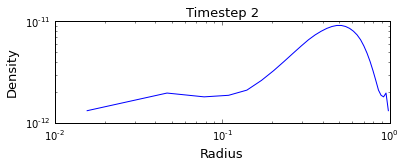

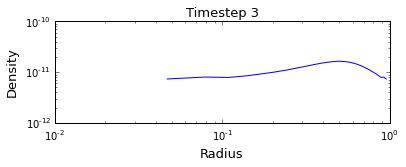

In [97]:
max_timestep = 4
for i in np.arange(1,max_timestep):
    density_radial_profile(i)

Trying to compare this with Fig 1 in Larson (1969)